# Improved Quantile Normalization 
This notebook overviews the results of the improved quantile normalization algorithm that does a better job of dealing with missing data. 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
import numpy as np
from copy import deepcopy

def load_data(data_type):
    import numpy as np
    import matplotlib.pyplot as plt
    # %matplotlib inline
    import matplotlib
    matplotlib.style.use('ggplot')
    from clustergrammer import Network
    from copy import deepcopy

    filename = '../lung_cellline_3_1_16/lung_cl_all_ptm/precalc_processed/' + \
             data_type + '.txt'

    # load file and export dataframe
    net = deepcopy(Network())
    net.load_file(filename)
    # net.swap_nan_for_zero()
    tmp_df = net.dat_to_df()
    df = tmp_df['mat']

    return df

In [59]:
# load data
###############

# filtering
################
# data_type = 'ptm45_filter_none'
# data_type = 'ptm45_filter_col-qn'
# data_type = 'ptm45_filter_col-qn_row-zscore'

# no filtering
################
data_type = 'ptm45_none'
# data_type = 'ptm45_col-iqn'
# data_type = 'ptm45_col-qn_row-zscore'


# nan and zero version of the data
df_nans = load_data(data_type)

rows = df_nans.index.tolist()

new_rows = []
for i in range(len(rows)):
    inst_row = rows[i]
    inst_row = inst_row + str(i)
    new_rows.append(inst_row)

df_nans.index = new_rows
    

df_zeros = deepcopy(df_nans)
df_zeros[np.isnan(df_zeros)] = 0

cols = df_zeros.columns.tolist()

In [60]:
rows = df_nans.index.tolist()
cols = df_nans.columns.tolist()

print(len(rows))
print(len(cols))

print('\n')

rows = list(set(rows))
cols = list(set(cols))


print(len(rows))
print(len(cols))

8468
45


8468
45


In [61]:
col_num = 0
series_nans = df_nans[cols[col_num]]
series_zeros = df_zeros[cols[col_num]]

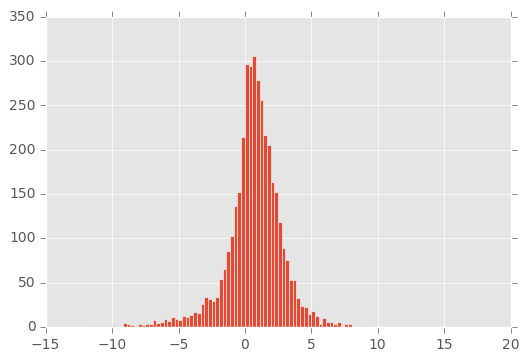

In [62]:
series_nans.hist(bins=100)

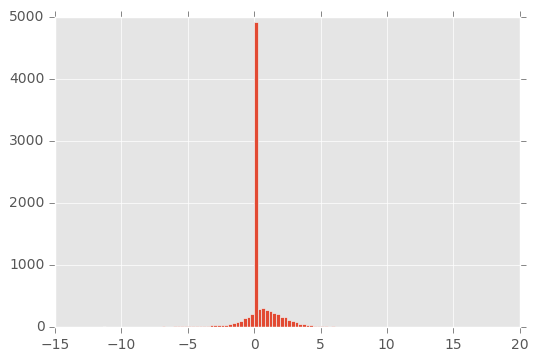

In [63]:
series_zeros.hist(bins=100)

## Scatterplot
This is a quick look at a scatterplot of PTM values from two cell lines with and withouth swapping nans for zeros

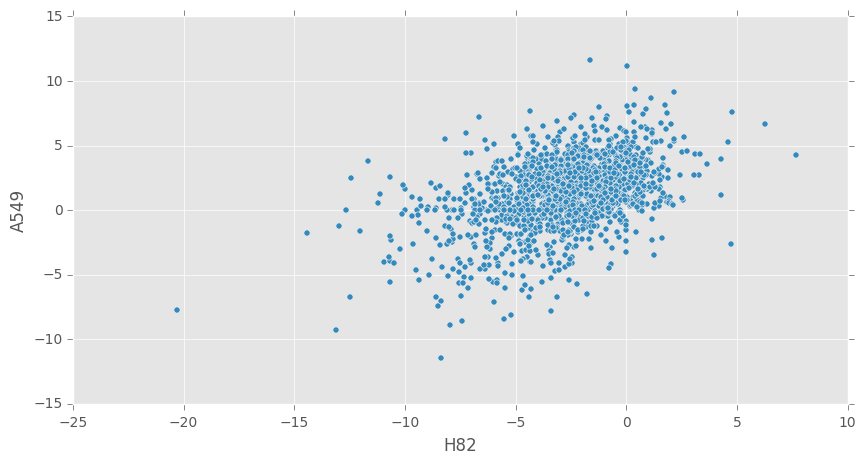

In [64]:
df_nans.plot(kind='scatter', figsize=(10,5), x=cols[5], y=cols[44])

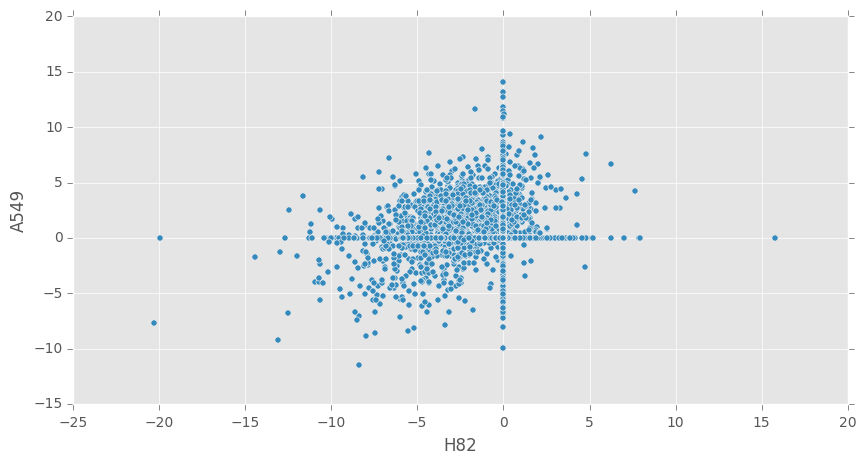

In [65]:
df_zeros.plot(kind='scatter', figsize=(10,5), x=cols[5], y=cols[44])

## Box plot
When nans are replaced with zeros, then zeros dominate the data.

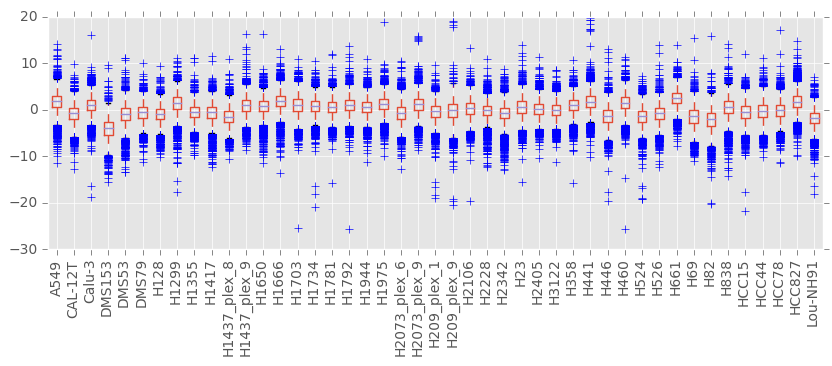

In [66]:
df_nans.plot(kind='box', figsize=(10,3), rot=90)

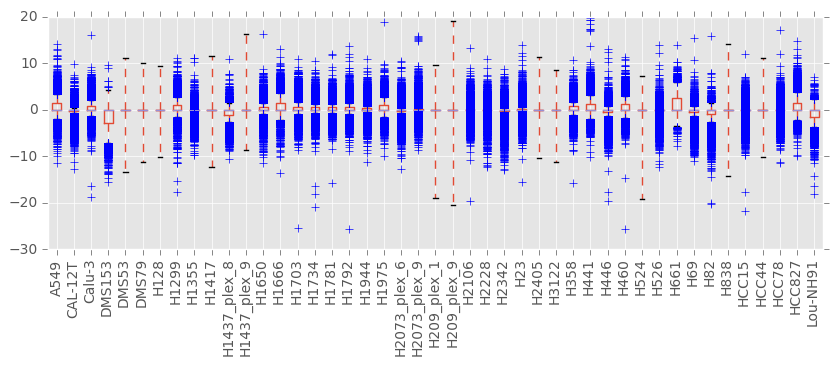

In [67]:
df_zeros.plot(kind='box', figsize=(10,3), rot=90)

In [68]:
df_nans.shape

(8468, 45)

In [69]:
from clustergrammer_widget import *
from copy import deepcopy

In [70]:
net = deepcopy(Network())
tmp_df = {}
tmp_df['mat'] = df_nans
net.df_to_dat(tmp_df)
net.swap_nan_for_zero()
net.filter_N_top('row', 200, rank_type='sum')
exp_df = net.dat_to_df()
# net.normalize(axis='row', norm_type='zscore', keep_orig=True)

In [71]:
net.make_clust()

In [72]:
clustergrammer_notebook(network = net.export_net_json())

['SASH3_S74630',
 'PRX_S14394126',
 'PLXNC1_S9783873',
 'NUCKS1_S193446',
 'KANK2_T5522533',
 'CD44_S697995',
 'TJP1_S11115331',
 'PEA15_S1043673',
 'SLC2A1_S4904802',
 'CAPZB_T267901',
 'TMEM119_S2125397',
 'FGD5_S7441948',
 'NCF2_T2333319',
 'ENAH_S1361678',
 'HBA2_Y252246',
 'BGN_K2547397',
 'HBB_Y1312248',
 'KANK2_S5402530',
 'TNS1_Y3665481',
 'ALB_T551416',
 'AHNAK_S210342',
 'ALB_K2237320',
 'ALB_K22326',
 'ALB_S603411',
 'ALB_K5987329',
 'PTPRA_Y7984182',
 'CAMK2D_T287883',
 'KANK3_S2932535',
 'PRKCDBP_S624035',
 'LAT_S2242752',
 'CA1_K1577414',
 'SPARCL1_S2954940',
 'HIST1H1C_S362296',
 'MFF_Y1483093',
 'NCF2_S2153318',
 'RSL1D1_T3404569',
 'RTN4_S1114586',
 'CLU_K1237453',
 'ALB_K2197319',
 'AHNAK_T5798362',
 'LBH_S632753',
 'RSPH4A_T694571',
 'HBB_K607684',
 'HIST1H4A_K167715',
 'KANK3_T2972536',
 'PEA15_S1163674',
 'HBA2_K1407677',
 'ABLIM1_S452251',
 'MCM4_T1023041',
 'TAGLN_S1665206']